In [1]:
##Project Done by : Omar Krichen and Zakaria Benbouzid
!pip install cartopy
import warnings
warnings.filterwarnings("ignore")

**Weather Data**

In [2]:
import cartopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
tempraw=pd.read_csv("dataTemp.csv",header=None,sep=";",index_col=0);
windraw=pd.read_csv("dataWind.csv",header=None,sep=";",index_col=0);
gps=pd.read_csv("dataGPS.csv",header=None,sep=";",index_col=0);
temp=tempraw.to_numpy();
wind=windraw.to_numpy();

**Weather in Paris**

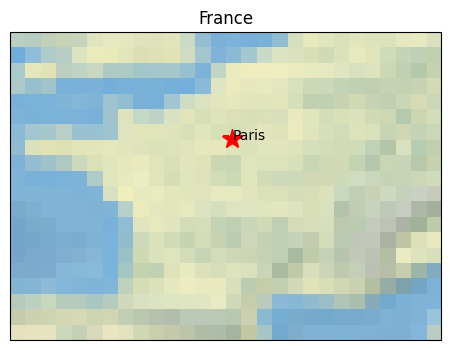

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1, 2, 1, projection=projection)
ax.set_extent([-5, 9, 42, 52])
ax.set_title("France")
x, y = 2.217999, 48.512381
ax.plot(x, y, 'r*', markersize=15)
ax.text(x, y, "Paris")
ax.stock_img();

**Temperature and Wind in Paris**

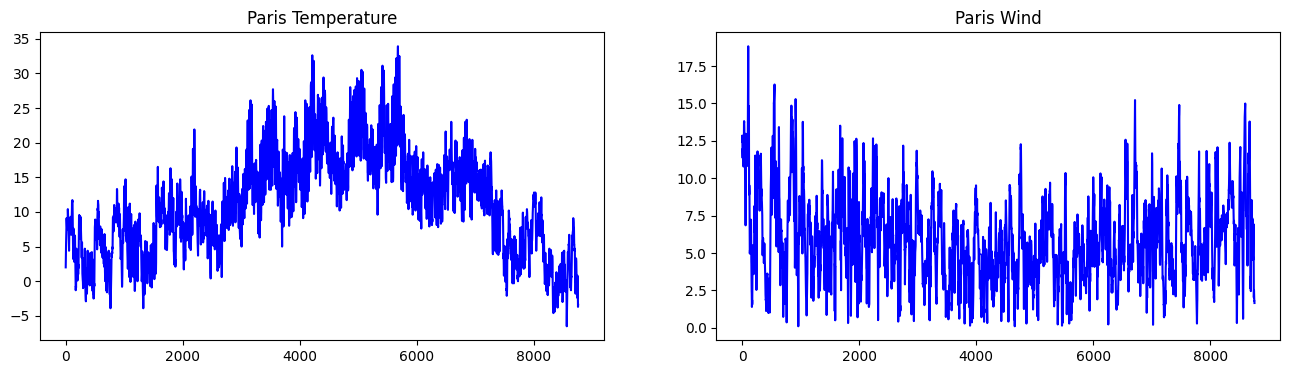

In [4]:
fig = plt.figure(figsize=(16,4));
ax1 = plt.subplot(121);
ax2 = plt.subplot(122);
ax1.plot(range(len(temp[33,:])), temp[33,:],"-b",label="temp");
ax1.set_title('Paris Temperature');
ax2.plot(range(len(wind[33,:])), wind[33,:],"-b",label="temp");
ax2.set_title('Paris Wind');
plt.show()

**Weather segmentation**

*I - Preliminary*

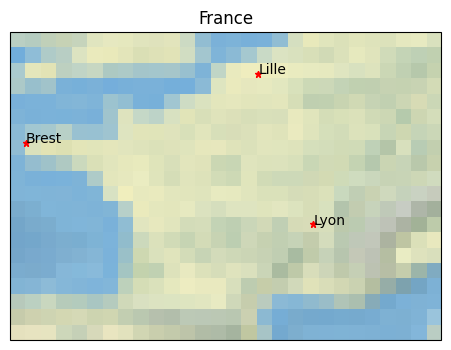

In [5]:
br_x, br_y = -4.48333,48.400002 ##TEMP3837 -> line 46
ly_x, ly_y = 4.85,45.75  ## TEMP4281 -> line 161
li_x, li_y = 3.06667,50.633331 ##TEMP3512-> line 4
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1, 2, 1, projection=projection)
ax.set_extent([-5, 9, 42, 52])
ax.set_title("France")
ax.plot(br_x, br_y, 'r*', markersize=5)
ax.text(br_x, br_y, "Brest")
ax.plot(ly_x, ly_y, 'r*', markersize=5)
ax.text(ly_x, ly_y, "Lyon")
ax.plot(li_x, li_y, 'r*', markersize=5)
ax.text(li_x, li_y, "Lille")
ax.stock_img()

Temperature and Wind in Brest

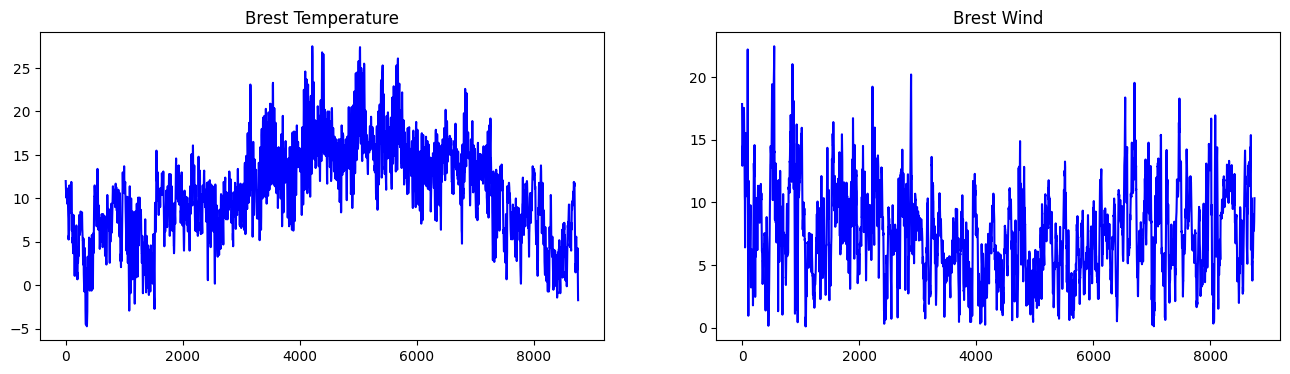

In [6]:
fig = plt.figure(figsize=(16,4));
ax1 = plt.subplot(121);
ax2 = plt.subplot(122);
ax1.plot(range(len(temp[46,:])), temp[46,:],"-b",label="temp");
ax1.set_title('Brest Temperature');
ax2.plot(range(len(wind[46,:])), wind[46,:],"-b",label="temp");
ax2.set_title('Brest Wind');
plt.show()

Temperature and Wind in Lyon

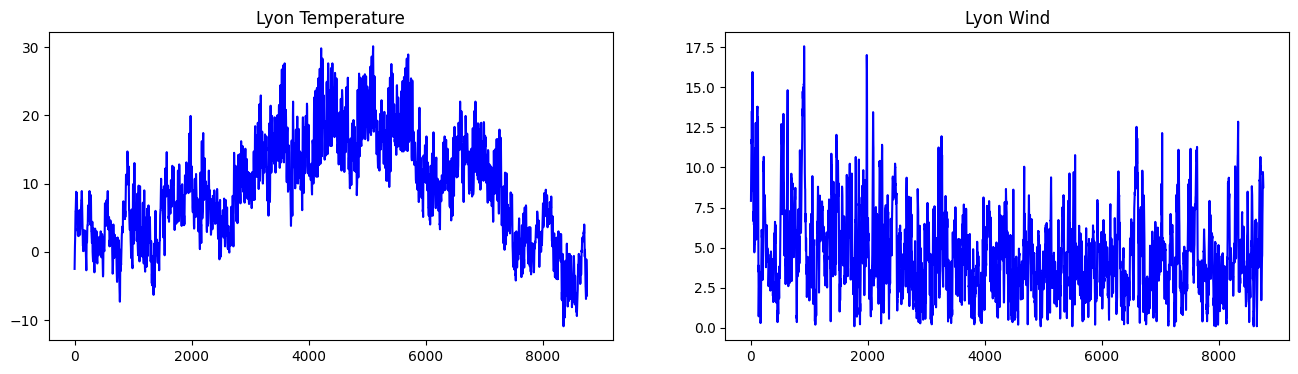

In [7]:
fig = plt.figure(figsize=(16,4));
ax1 = plt.subplot(121);
ax2 = plt.subplot(122);
ax1.plot(range(len(temp[161,:])), temp[161,:],"-b",label="temp");
ax1.set_title('Lyon Temperature');
ax2.plot(range(len(wind[161,:])), wind[161,:],"-b",label="temp");
ax2.set_title('Lyon Wind');
plt.show()

Temperature and Wind in Lille

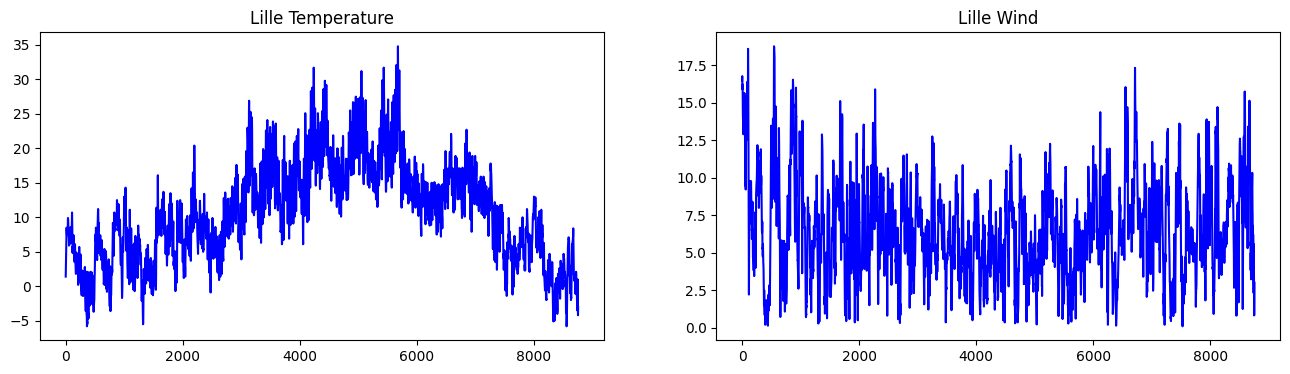

In [8]:
fig = plt.figure(figsize=(16,4));
ax1 = plt.subplot(121);
ax2 = plt.subplot(122);
ax1.plot(range(len(temp[4,:])), temp[4,:],"-b",label="temp");
ax1.set_title('Lille Temperature');
ax2.plot(range(len(wind[4,:])), wind[4,:],"-b",label="temp");
ax2.set_title('Lille Wind');
plt.show()

A naive segmentation of the weather.

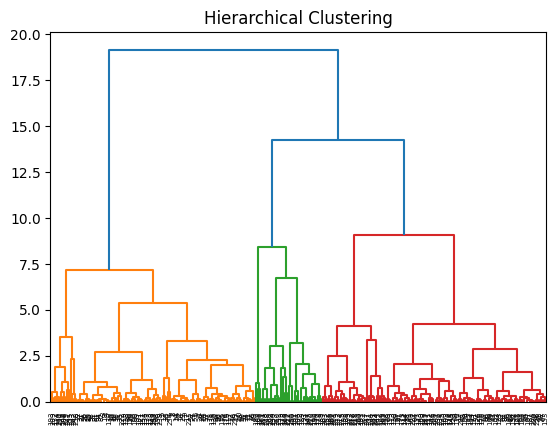

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

data=np.zeros((temp.shape[0],2))
for i in range(temp.shape[0]):
  data[i,0]=np.sum(temp[i,:])/temp.shape[1]
  data[i,1]=np.sum(wind[i,:])/temp.shape[1]

features = pd.DataFrame(data, columns=['Average Temperature', 'Average Wind'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Hierarchical clustering
linkage_matrix = linkage(scaled_features, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering")
plt.show()

# Cut the dendrogram to get cluster labels for hierarchical clustering
num_clusters = 4
hierarchical_labels = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit_predict(scaled_features)
# Add cluster labels to the original DataFrame
features['KMeans_Cluster'] = kmeans_labels
features['Hierarchical_Cluster'] = hierarchical_labels

Text(7.55, 45.75, 'Cluster 4')

<Figure size 640x480 with 0 Axes>

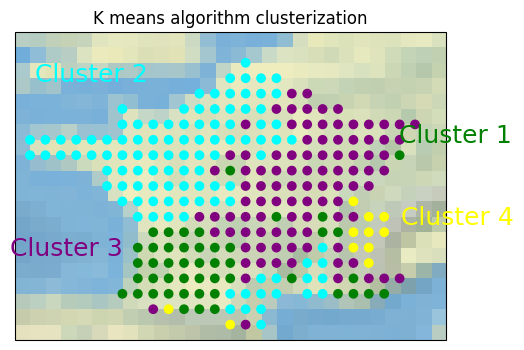

In [20]:
colors = []
for i in range(temp.shape[0]):
    if features['KMeans_Cluster'][i] == 0:
        colors.append('green')
    if features['KMeans_Cluster'][i] == 1:
        colors.append('cyan')
    if features['KMeans_Cluster'][i] == 2:
        colors.append('purple')
    if features['KMeans_Cluster'][i] == 3:
        colors.append('yellow')

plt.figure()
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1, 2, 1, projection=projection)
ax.set_extent([-5, 9, 42, 52])
ax.set_title("K means algorithm clusterization")
ax.stock_img()
plt.scatter(gps.iloc[:,0], gps.iloc[:,1], c=colors)
plt.text(li_x+4.4, br_y, "Cluster 1", c='green', fontsize=18)
plt.text(li_x-7.4, br_y+2, "Cluster 2", c='cyan', fontsize=18)
plt.text(ly_x-10, ly_y-1, "Cluster 3", c='purple', fontsize=18)
plt.text(ly_x+2.7, ly_y, "Cluster 4", c='yellow',fontsize=18)

II-Wind Clustering

Raw data


In [11]:
from sklearn.metrics import silhouette_score
features=wind.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Hierarchical clustering
num_clusters = 4
hierarchical_labels = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit_predict(scaled_features)

##The silhouette score measures how well-defined the clusters are. A higher silhouette score indicates better-defined clusters.
silhouette_kmeans = silhouette_score(features, kmeans_labels)
silhouette_hierarchical = silhouette_score(features, hierarchical_labels)

# Print results
print("KMeans Silhouette Score:", silhouette_kmeans)
print("Hierarchical Silhouette Score:", silhouette_hierarchical)



KMeans Silhouette Score: 0.19802345118744918
Hierarchical Silhouette Score: 0.16728765885314073


Feature extraction

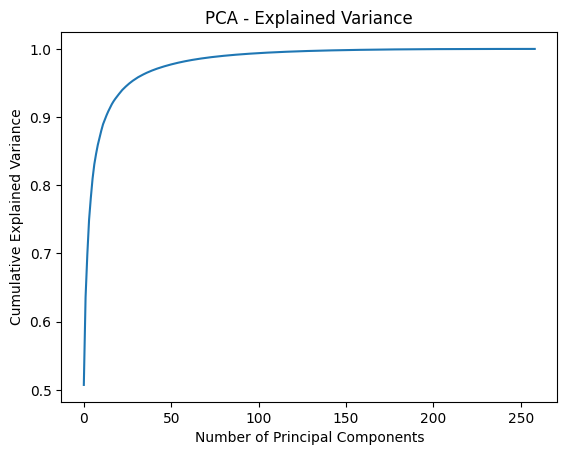

For 95% variance achived,we need to keep 28 principal components.


In [12]:
from sklearn.decomposition import PCA

#  Principal Component Analysis (PCA)
scaler = StandardScaler()
scaled_wind = scaler.fit_transform(wind.copy().T)

pca = PCA()
pca.fit(scaled_wind)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Plot explained variance ratio
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print("For 95% variance achived,we need to keep",num_components,"principal components.")



Clustering

In [22]:
scaler = StandardScaler()
scaled_wind = scaler.fit_transform(wind.copy().T)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_wind)

#  Segmentation based on PCA Representation
kmeans_pca = KMeans(n_clusters=4)
kmeans_labels_pca = kmeans_pca.fit_predict(pca_result)

hierarchical_pca = AgglomerativeClustering(n_clusters=4)
hierarchical_labels_pca = hierarchical_pca.fit_predict(pca_result)

silhouette_kmeans = silhouette_score(features, kmeans_labels)
silhouette_hierarchical = silhouette_score(features, hierarchical_labels)

# Print results
print("KMeans Silhouette Score:", silhouette_kmeans)
print("Hierarchical Silhouette Score:", silhouette_hierarchical)
## We have the same result but with fewer dimension used,so it cost less to compute

KMeans Silhouette Score: 0.41883597658810645
Hierarchical Silhouette Score: 0.4021138980690737


III-Temperature Clustering


Raw data


In [14]:
features=temp.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Hierarchical clustering
num_clusters = 4
hierarchical_labels = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit_predict(scaled_features)

##The silhouette score measures how well-defined the clusters are. A higher silhouette score indicates better-defined clusters.
silhouette_kmeans = silhouette_score(features, kmeans_labels)
silhouette_hierarchical = silhouette_score(features, hierarchical_labels)

# Print results
print("KMeans Silhouette Score:", silhouette_kmeans)
print("Hierarchical Silhouette Score:", silhouette_hierarchical)



KMeans Silhouette Score: 0.24243132597035305
Hierarchical Silhouette Score: 0.21714116513349613


Feature extraction

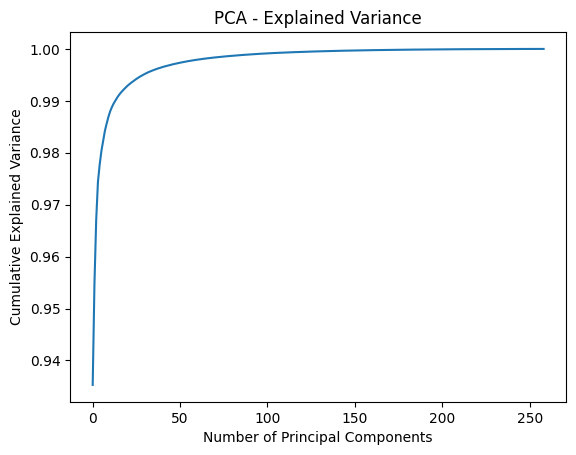

For 95% variance achived,we need to keep 2 principal components.


In [15]:
#  Principal Component Analysis (PCA)
scaler = StandardScaler()
scaled_temp = scaler.fit_transform(temp.copy().T)

pca = PCA()
pca.fit(scaled_temp)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Plot explained variance ratio
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print("For 95% variance achived,we need to keep",num_components,"principal components.")


Clustering using model based.

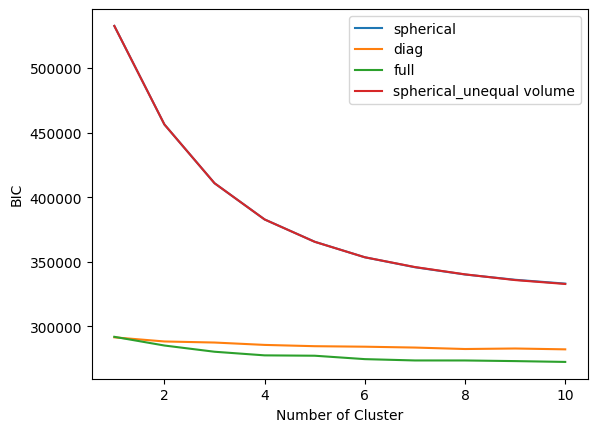

In [16]:
from sklearn.mixture import GaussianMixture
scaler = StandardScaler()
scaled_temp = scaler.fit_transform(temp.copy().T)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_temp)
cluster=["spherical","diag","full"]
component=[h for h in range(1,11)]
def generate_numbers(j):
    random_numbers = np.random.rand(j - 1)
    random_numbers.sort()
    numbers = [0] + random_numbers.tolist() + [1]
    result = [numbers[i+1] - numbers[i] for i in range(j)]
    return result
for i in cluster:
  BIC=[]
  for j in component:
    gmm_spherical = GaussianMixture(n_components=j, covariance_type=i)
    gmm_spherical.fit(pca_result)
    BIC.append(gmm_spherical.bic(pca_result))
  plt.plot(component,BIC,label=i)
  plt.xlabel('Number of Cluster')
  plt.ylabel('BIC')
BIC=[]
for j in component:
  gmm_spherical = GaussianMixture(n_components=j, covariance_type="spherical",weights_init=generate_numbers(j))
  gmm_spherical.fit(pca_result)
  BIC.append(gmm_spherical.bic(pca_result))
plt.plot(component,BIC,label="spherical_unequal volume")
plt.xlabel('Number of Cluster')
plt.ylabel('BIC')
plt.legend()
plt.show()
##We suggest to use 4 clusters for Spherical clustering because the BIC doesn't vary significantly anymore, and 2 clusters to Diag and Full since for same reason.


Clustering using spectral clustering


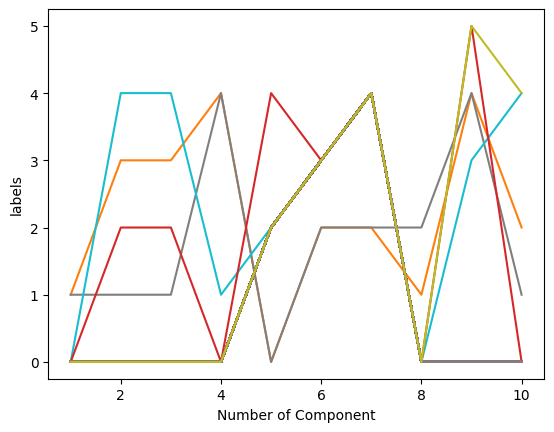

In [17]:
from sklearn.cluster import SpectralClustering
scaler = StandardScaler()
scaled_temp = scaler.fit_transform(temp)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_temp)
cluster=["spherical","diag","full"]
component=[h for h in range(1,11)]
labels=[]
for j in component:
  sc_ = SpectralClustering(n_components=j)
  sc_.fit(pca_result)
  labels.append(sc_.labels_)
plt.plot(component,labels)
plt.xlabel('Number of Component')
plt.ylabel('labels')
plt.show()

Part IV is treated in the report